In [1]:
import pickle
import joblib
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
dic_results_cntl = np.load('dic_results_best_k_ERA5_clean.npy', allow_pickle=True)[()]
dic_results_exp1 = np.load('dic_results_best_k_Exp5.npy', allow_pickle=True)[()]
dic_results_exp2 = np.load('dic_results_best_k_Exp9.npy', allow_pickle=True)[()]

In [3]:
ds_cntl = xr.open_dataset('/glade/derecho/scratch/molina/WRComps_ERA5_Clean.nc')
ds_exp1 = xr.open_dataset('/glade/derecho/scratch/molina/WRComps_ERA5_Exp5.nc')
ds_exp2 = xr.open_dataset('/glade/derecho/scratch/molina/WRComps_ERA5_Exp9.nc')

In [4]:
df_cntl = pd.read_csv('/glade/derecho/scratch/molina/WRDF_ERA5_Clean.csv')
df_cntl.rename(columns={'Unnamed: 0':'time'}, inplace=True)
df_exp1 = pd.read_csv('/glade/derecho/scratch/molina/WRDF_ERA5_Exp5.csv')
df_exp1.rename(columns={'Unnamed: 0':'time'}, inplace=True)
df_exp2 = pd.read_csv('/glade/derecho/scratch/molina/WRDF_ERA5_Exp9.csv')
df_exp2.rename(columns={'Unnamed: 0':'time'}, inplace=True)

In [5]:
freq_cntl = (df_cntl['WR'].value_counts(normalize=True) * 100).sort_index()
freq_exp1 = (df_exp1['WR'].value_counts(normalize=True) * 100).sort_index()
freq_exp2 = (df_exp2['WR'].value_counts(normalize=True) * 100).sort_index()
# above equivalent to: 
# df_cntl['time'] = pd.to_datetime(df_cntl['time'].values)
# (df_cntl.set_index('time').groupby([pd.Grouper(freq='YE'), 'WR'])['WR'].value_counts()/365 * 100).groupby('WR').mean()

- CNTL: AL, AR, NAH, PT, PR, GH, NoWR
- EXP1: PT, CUSH, PR, GH, NoWR
- EXP2: GH, CUSH, AR, PR, PT, NAH, NoWR

In [6]:
dict_cntl_wrs = {
    'AL'  : 0,
    'AR'  : 1,
    'NAH' : 2,
    'PT'  : 3,
    'PR'  : 4,
    'GH'  : 5,
    'None': 6
}

dict_exp1_wrs = {
    'PT'  : 0,
    'CUSH': 1,
    'PR'  : 2,
    'GH'  : 3,
    'None': 4
}

dict_exp2_wrs = {
    'GH'  : 0,
    'CUSH': 1,
    'AR'  : 2,
    'PR'  : 3,
    'PT'  : 4,
    'NAH' : 5,
    'None': 6
}

In [7]:
dict_cntl = {
    'AL'  : freq_cntl.loc[dict_cntl_wrs['AL']], 
    'AR'  : freq_cntl.loc[dict_cntl_wrs['AR']], 
    'CUSH': 0, 
    'GH'  : freq_cntl.loc[dict_cntl_wrs['GH']], 
    'NAH' : freq_cntl.loc[dict_cntl_wrs['NAH']], 
    'PR'  : freq_cntl.loc[dict_cntl_wrs['PR']], 
    'PT'  : freq_cntl.loc[dict_cntl_wrs['PT']]
}
dict_exp1 = {
    'AL'  : 0, 
    'AR'  : 0, 
    'CUSH': freq_exp1.loc[dict_exp1_wrs['CUSH']], 
    'GH'  : freq_exp1.loc[dict_exp1_wrs['GH']], 
    'NAH' : 0, 
    'PR'  : freq_exp1.loc[dict_exp1_wrs['PR']], 
    'PT'  : freq_exp1.loc[dict_exp1_wrs['PT']]
}
dict_exp2 = {
    'AL'  : 0, 
    'AR'  : freq_exp2.loc[dict_exp2_wrs['AR']], 
    'CUSH': freq_exp2.loc[dict_exp2_wrs['CUSH']],
    'GH'  : freq_exp2.loc[dict_exp2_wrs['GH']], 
    'NAH' : freq_exp2.loc[dict_exp2_wrs['NAH']], 
    'PR'  : freq_exp2.loc[dict_exp2_wrs['PR']], 
    'PT'  : freq_exp2.loc[dict_exp2_wrs['PT']]
}

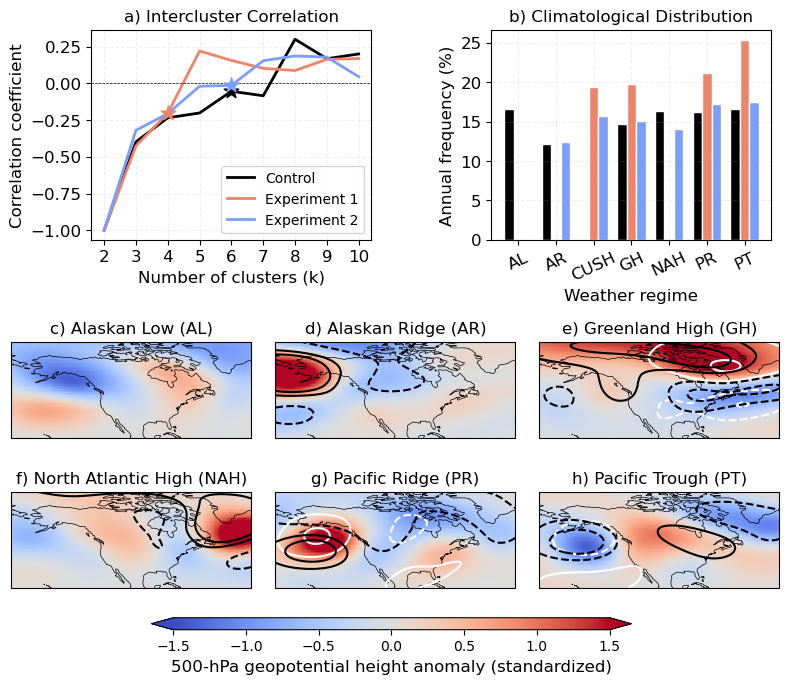

In [8]:
#-----------------------%

fig = plt.figure(figsize=(8.,6.))
#fig.suptitle('Case Study #1: Subseasonal Weather Regimes', fontsize=12, y=1.02)

#-----------------------%

ax1 = fig.add_axes([0.1, 0.6, 0.35, 0.35])

ax1.plot(
    np.arange(2, 11),
    dic_results_cntl['max_intercluster_corr'],
    color='k',
    lw=2, ls='-',
    label='Control'
)
ax1.scatter(
    np.arange(2, 11)[np.argwhere(
        np.array(dic_results_cntl['max_intercluster_corr'])==np.max(
            np.array(dic_results_cntl['max_intercluster_corr'])[np.array(
                dic_results_cntl['max_intercluster_corr'])<=0]
        )
    )][0],
    np.max(
        np.array(dic_results_cntl['max_intercluster_corr'])[np.array(
            dic_results_cntl['max_intercluster_corr'])<=0]
    ),
    marker='*',
    color='k',
    s=120, zorder=20,
)

cmap = plt.get_cmap(
    'coolwarm'
)

ax1.plot(
    np.arange(2, 11),
    dic_results_exp1['max_intercluster_corr'],
    color=cmap(0.8),
    lw=2,
    label='Experiment 1'
)
ax1.scatter(
    np.arange(2, 11)[np.argwhere(
        np.array(dic_results_exp1['max_intercluster_corr'])==np.max(
            np.array(dic_results_exp1['max_intercluster_corr'])[np.array(
                dic_results_exp1['max_intercluster_corr'])<=0]
        )
    )][0],
    np.max(
        np.array(dic_results_exp1['max_intercluster_corr'])[np.array(
            dic_results_exp1['max_intercluster_corr'])<=0]
    ),
    marker='*',
    color=cmap(0.8),
    s=120, zorder=20,
)

ax1.plot(
    np.arange(2, 11),
    dic_results_exp2['max_intercluster_corr'],
    color=cmap(0.2),
    lw=2,
    label='Experiment 2'
)
ax1.scatter(
    np.arange(2, 11)[np.argwhere(
        np.array(dic_results_exp2['max_intercluster_corr'])==np.max(
            np.array(dic_results_exp2['max_intercluster_corr'])[np.array(
                dic_results_exp2['max_intercluster_corr'])<=0]
        )
    )][0],
    np.max(
        np.array(dic_results_exp2['max_intercluster_corr'])[np.array(
            dic_results_exp2['max_intercluster_corr'])<=0]
    ),
    marker='*',
    color=cmap(0.2),
    s=120, zorder=20,
)

ax1.axhline(0, color='k', ls='--', lw=0.5)
ax1.set_xlabel('Number of clusters (k)', fontsize=12)
ax1.set_ylabel('Correlation coefficient', fontsize=12)
ax1.set_title('a) Intercluster Correlation', fontsize=12)
ax1.set_xticks(np.arange(2, 11))
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(alpha=0.2, ls='--')
plt.legend()

#-----------------------%

ax2 = fig.add_axes([0.6, 0.6, 0.35, 0.35])

ax2.bar(
    np.arange(0, 7, 1) - 0.25, 
    dict_cntl.values(), 
    width=0.25,
    edgecolor='w',
    facecolor='k'
)
ax2.bar(
    np.arange(0, 7, 1), 
    dict_exp1.values(), 
    width=0.25,
    edgecolor='w',
    facecolor=cmap(0.8)
)
ax2.bar(
    np.arange(0, 7, 1) + 0.25, 
    dict_exp2.values(), 
    width=0.25,
    edgecolor='w',
    facecolor=cmap(0.2)
)
ax2.set_title('b) Climatological Distribution', fontsize=12)
ax2.grid(alpha=0.2, ls='--')
ax2.set_xlabel('Weather regime', fontsize=12)
ax2.set_ylabel('Annual frequency (%)', fontsize=12)
ax2.tick_params(axis='x', which='major', labelsize=12, rotation=25)
ax2.tick_params(axis='y', which='major', labelsize=12)
ax2.set_xticks(
    np.arange(0, 7, 1),
    ['AL', 'AR', 'CUSH', 'GH', 'NAH', 'PR', 'PT']
)

#-----------------------%

# Convert longitudes to -180 to 180 range
lon = (ds_cntl.coords['lon'] + 180) % 360 - 180
lat = ds_cntl.coords['lat'].values

ax3 = fig.add_axes(
    [0.0, 0.25, 0.3, 0.2], 
    projection=ccrs.PlateCarree(central_longitude=-100)
)
ax3.set_title('c) Alaskan Low (AL)', fontsize=12)
ax3.pcolormesh(
    lon, 
    lat, 
    ds_cntl.isel(WR=0)['Z_anom'].values,
    vmin=-1.5, vmax=1.5,
    cmap='coolwarm', 
    transform=ccrs.PlateCarree()
)
ax3.coastlines(linewidth=0.5)
ax3.set_extent([180, 330, 20, 80], crs=ccrs.PlateCarree())

#-----------------------%

ax4 = fig.add_axes(
    [0.33, 0.25, 0.3, 0.2], 
    projection=ccrs.PlateCarree(central_longitude=-100)
)
ax4.set_title('d) Alaskan Ridge (AR)', fontsize=12)
ax4.pcolormesh(
    lon, 
    lat, 
    ds_cntl.isel(WR=1)['Z_anom'].values,
    vmin=-1.5, vmax=1.5,
    cmap='coolwarm', 
    transform=ccrs.PlateCarree()
)
ax4.contour(
    lon, 
    lat, 
    ds_exp2.isel(WR=2)['Z_anom'].values,
    levels=[-1, -0.5, 0.5, 1],
    colors='k',
    transform=ccrs.PlateCarree()
)
ax4.coastlines(linewidth=0.5)
ax4.set_extent([180, 330, 20, 80], crs=ccrs.PlateCarree())

#-----------------------%

ax5 = fig.add_axes(
    [0.66, 0.25, 0.3, 0.2], 
    projection=ccrs.PlateCarree(central_longitude=-100)
)
ax5.set_title('e) Greenland High (GH)', fontsize=12)
ax5.pcolormesh(
    lon, 
    lat, 
    ds_cntl.isel(WR=5)['Z_anom'].values,
    vmin=-1.5, vmax=1.5,
    cmap='coolwarm', 
    transform=ccrs.PlateCarree()
)
ax5.contour(
    lon, 
    lat, 
    ds_exp1.isel(WR=3)['Z_anom'].values,
    levels=[-1, -0.5, 0.5, 1],
    colors='w',
    transform=ccrs.PlateCarree()
)
ax5.contour(
    lon, 
    lat, 
    ds_exp2.isel(WR=0)['Z_anom'].values,
    levels=[-1, -0.5, 0.5, 1],
    colors='k',
    transform=ccrs.PlateCarree()
)
ax5.coastlines(linewidth=0.5)
ax5.set_extent([180, 330, 20, 80], crs=ccrs.PlateCarree())

#-----------------------%

ax6 = fig.add_axes(
    [0.0, 0.0, 0.3, 0.2], 
    projection=ccrs.PlateCarree(central_longitude=-100)
)
ax6.set_title('f) North Atlantic High (NAH)', fontsize=12)
ax6.pcolormesh(
    lon, 
    lat, 
    ds_cntl.isel(WR=2)['Z_anom'].values,
    vmin=-1.5, vmax=1.5,
    cmap='coolwarm', 
    transform=ccrs.PlateCarree()
)
ax6.contour(
    lon, 
    lat, 
    ds_exp2.isel(WR=5)['Z_anom'].values,
    levels=[-1, -0.5, 0.5, 1],
    colors='k',
    transform=ccrs.PlateCarree()
)
ax6.coastlines(linewidth=0.5)
ax6.set_extent([180, 330, 20, 80], crs=ccrs.PlateCarree())

#-----------------------%

ax7 = fig.add_axes(
    [0.33, 0.0, 0.3, 0.2], 
    projection=ccrs.PlateCarree(central_longitude=-100)
)
ax7.set_title('g) Pacific Ridge (PR)', fontsize=12)
ax7.pcolormesh(
    lon, 
    lat, 
    ds_cntl.isel(WR=4)['Z_anom'].values,
    vmin=-1.5, vmax=1.5,
    cmap='coolwarm', 
    transform=ccrs.PlateCarree()
)
ax7.contour(
    lon, 
    lat, 
    ds_exp1.isel(WR=2)['Z_anom'].values,
    levels=[-1, -0.5, 0.5, 1],
    colors='w',
    transform=ccrs.PlateCarree()
)
ax7.contour(
    lon, 
    lat, 
    ds_exp2.isel(WR=3)['Z_anom'].values,
    levels=[-1, -0.5, 0.5, 1],
    colors='k',
    transform=ccrs.PlateCarree()
)
ax7.coastlines(linewidth=0.5)
ax7.set_extent([180, 330, 20, 80], crs=ccrs.PlateCarree())

#-----------------------%

ax8 = fig.add_axes(
    [0.66, 0.0, 0.3, 0.2], 
    projection=ccrs.PlateCarree(central_longitude=-100)
)
ax8.set_title('h) Pacific Trough (PT)', fontsize=12)
cs = ax8.pcolormesh(
    lon, 
    lat, 
    ds_cntl.isel(WR=3)['Z_anom'].values,
    vmin=-1.5, vmax=1.5,
    cmap='coolwarm', 
    transform=ccrs.PlateCarree()
)
ax8.contour(
    lon, 
    lat, 
    ds_exp1.isel(WR=0)['Z_anom'].values,
    levels=[-1, -0.5, 0.5, 1],
    colors='w',
    transform=ccrs.PlateCarree()
)
ax8.contour(
    lon, 
    lat, 
    ds_exp2.isel(WR=4)['Z_anom'].values,
    levels=[-1, -0.5, 0.5, 1],
    colors='k',
    transform=ccrs.PlateCarree()
)
ax8.coastlines(linewidth=0.5)
ax8.set_extent([180, 330, 20, 80], crs=ccrs.PlateCarree())

#-----------------------%

cbar_ax = fig.add_axes([0.175, -0.05, 0.6, 0.02])
cbar = plt.colorbar(cs, location='bottom', orientation='horizontal', extend='both', cax=cbar_ax)
cbar.set_label('500-hPa geopotential height anomaly (standardized)', fontsize=12)

#-----------------------%

plt.savefig(f"bams_casestudy1.png", bbox_inches='tight', dpi=500)
plt.show()

#-----------------------%